In [1]:
import json
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_datetime(time_stamp):
    date = datetime.datetime.strptime(time_stamp,'%Y-%m-%d %H:%M:%S')
    weekday = date.weekday()
    hour = date.hour + date.minute/60 # Convert time to decimal hours
    return weekday,hour

In [3]:
with open('TiktokData.json','r') as json_file:
    json_list = list(json_file)
json_file.close()

video_list = []
video_set = set()
# Filter and collect unique videos
for json_str in json_list:
    video = json.loads(json_str)
    videoID = video['videoId']
    if videoID not in video_set:
        video_list.append(video)
        video_set.add(videoID)
    

# Extract followers,likes, and timestamps
followers = np.array([video['followerCount'] for video in video_list])
likes = np.array([video['likes'] for video in video_list])
timestamps = np.array([get_datetime(video['createDate']) 
                       for video in video_list])

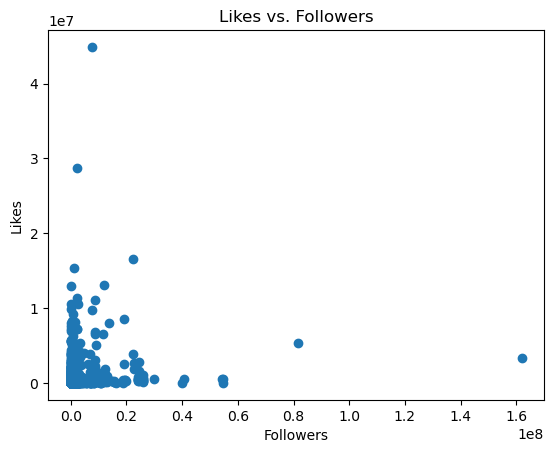

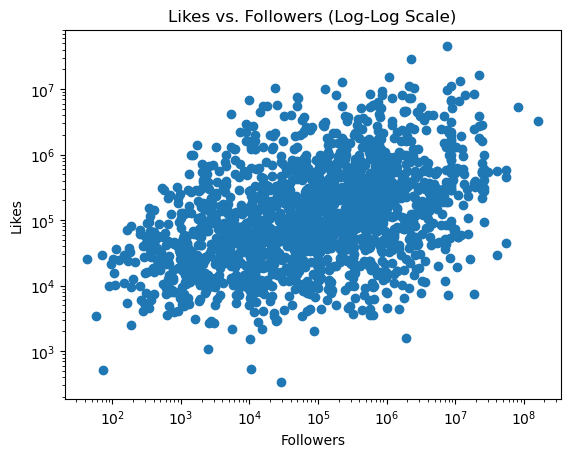

[[1.         0.41989218]
 [0.41989218 1.        ]]


In [79]:
# Plot Likes vs. Followers

plt.scatter(followers,likes)
plt.title('Likes vs. Followers')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.show()

plt.scatter(followers,likes)
plt.title('Likes vs. Followers (Log-Log Scale)')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.loglog()
plt.show()

log_x = np.log10(followers)
log_y = np.log10(likes)
corr = np.corrcoef(log_x,log_y)
print(corr)
# plt.scatter(log_x,log_y)

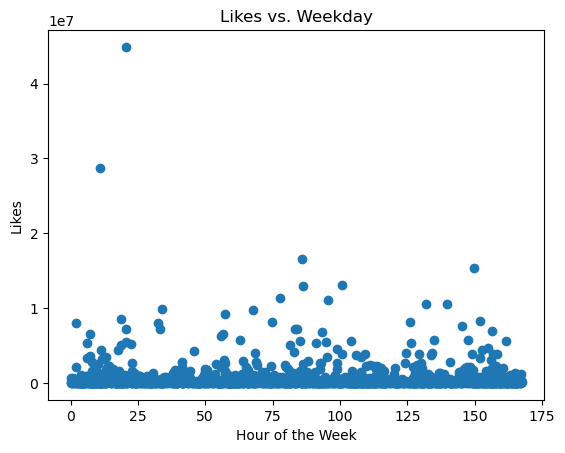

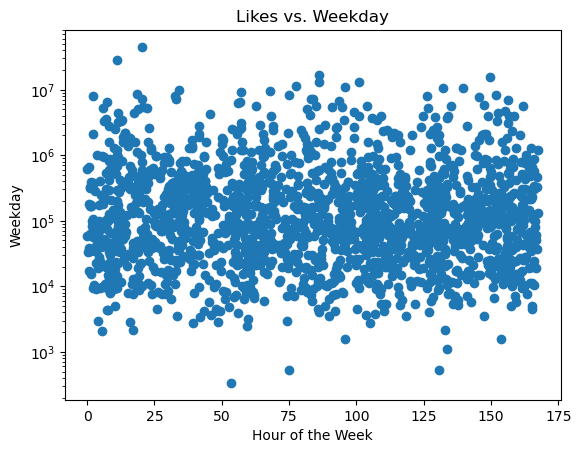

In [5]:
# Plot Likes vs. Timestamp

weekdays = timestamps[:,0]
hours = timestamps[:,1]
digit_hours = weekdays*24 + hours

plt.scatter(digit_hours,likes)
plt.title('Likes vs. Weekday')
plt.xlabel('Hour of the Week')
plt.ylabel('Likes')
plt.show()

plt.scatter(digit_hours,likes)
plt.title('Likes vs. Weekday')
plt.xlabel('Hour of the Week')
plt.ylabel('Weekday')
plt.yscale('log')
plt.show()

Text(0, 0.5, 'Likes Ignoring Followers')

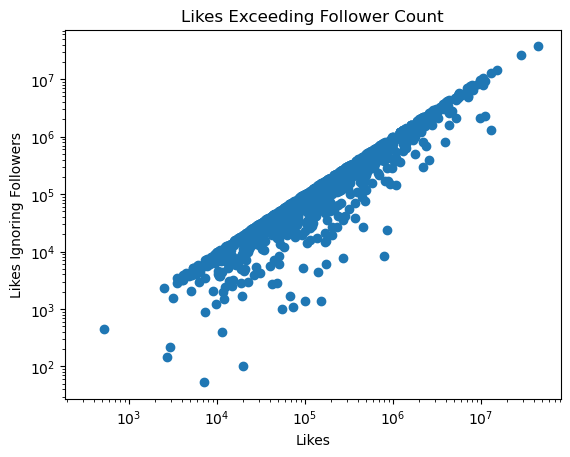

In [87]:
likes = np.array(likes)
followers = np.array(followers)

x = likes
y = followers
plt.scatter(likes,likes-followers)
plt.loglog()

plt.title('Likes Exceeding Follower Count')
plt.xlabel('Likes')
plt.ylabel('Likes Ignoring Followers')

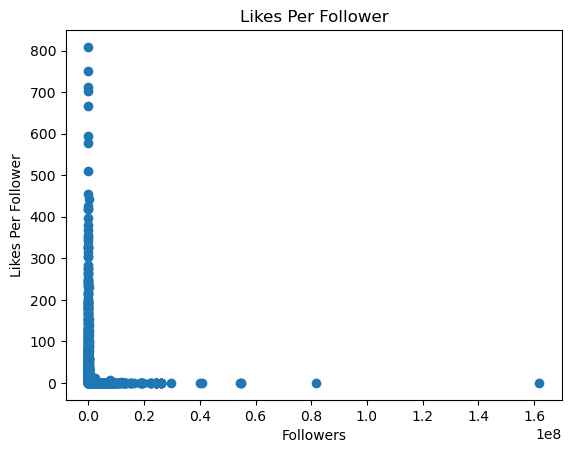

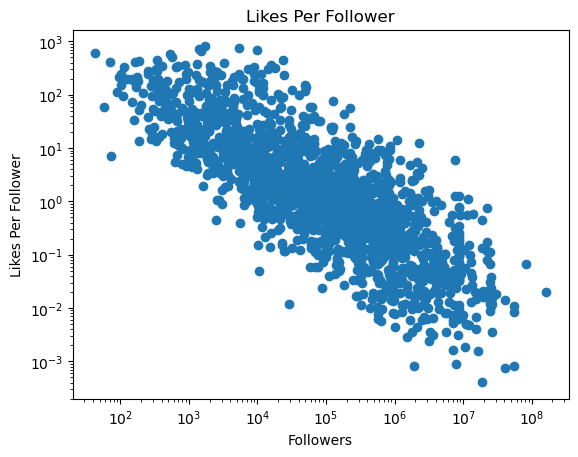

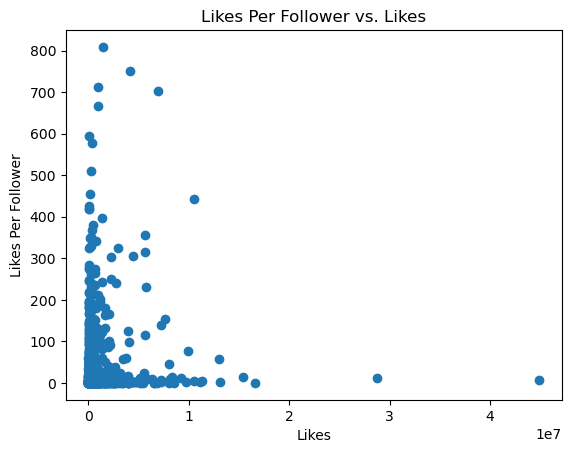

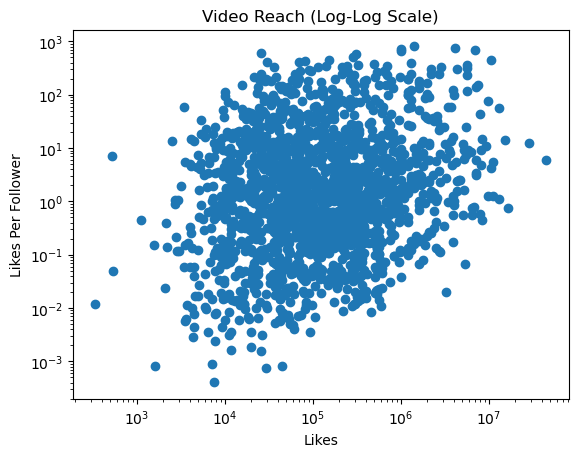

[[1.         0.09930646]
 [0.09930646 1.        ]]


In [81]:
# Plot ratio of likes to followers

plt.scatter(followers,likes/followers)
plt.title('Likes Per Follower')
plt.xlabel('Followers')
plt.ylabel('Likes Per Follower')
plt.show()

plt.scatter(followers,likes/followers)
plt.title('Likes Per Follower')
plt.xlabel('Followers')
plt.ylabel('Likes Per Follower')
plt.loglog()
plt.show()

plt.scatter(likes,likes/followers)
plt.title('Likes Per Follower vs. Likes')
plt.xlabel('Likes')
plt.ylabel('Likes Per Follower')
plt.show()

plt.scatter(likes,likes/followers)
plt.title('Video Reach (Log-Log Scale)')
plt.xlabel('Likes')
plt.ylabel('Likes Per Follower')
plt.loglog()
plt.show()

x = likes
y = likes/followers
corr = np.corrcoef(x,y)
print(corr)


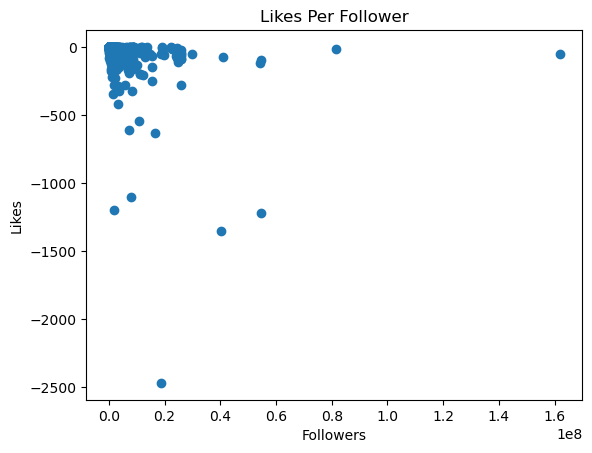

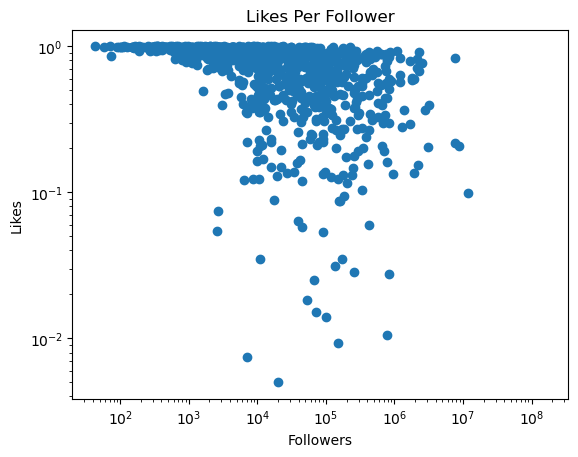

In [8]:
likes = np.array(likes)
followers = np.array(followers)

excess = (likes-followers)/likes
plt.scatter(followers,excess)
plt.title('Likes Per Follower')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.show()

plt.scatter(followers,excess)
plt.title('Likes Per Follower')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.loglog()
plt.show()

In [9]:
# Distribution of Likes/Follower

ratio = likes[idx]/followers[idx]
plt.hist(ratio)
plt.title('Distribution of Likes to Follower Ratio')

NameError: name 'idx' is not defined

Text(0.5, 1.0, 'Distribution of Likes')

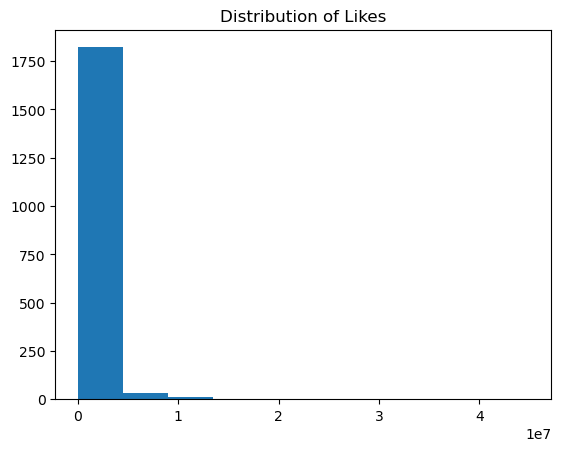

In [10]:
plt.hist(likes)
plt.title('Distribution of Likes')

Number of unique hashtags: 5151
#fyp 661
[4063, 584, 193, 84, 65, 32, 27, 18, 13, 9, 4, 6, 12, 5, 1, 1, 2, 3, 2, 3, 2, 1, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


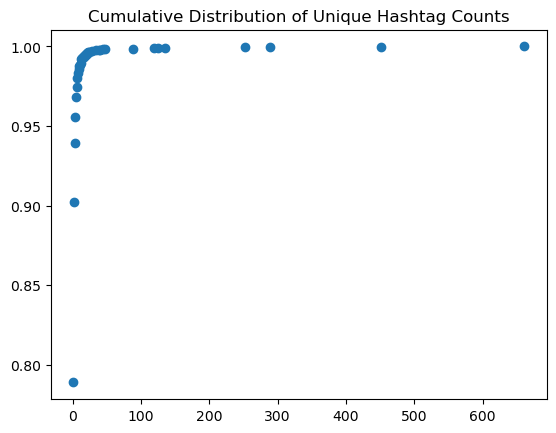

In [83]:
# Analyze distribution of hashtags

hashtags = []
for video in video_list:
    hashtags += video['hashtags']

# Get counts of each unique hash tag
unique = set(hashtags)
unique = list(unique)
tag_counts = [hashtags.count(tag) for tag in unique]
print("Number of unique hashtags:",len(unique))
idx = tag_counts.index(max(tag_counts))
print(unique[idx],tag_counts[idx])

# Get counts of counts 
# For example # of hashtags only appearing once in the data set
unique_counts = sorted(list(set(tag_counts)))
counts = [tag_counts.count(i) for i in unique_counts]

# Plot Cumulative Distribution Function of counts
CDF = np.cumsum(counts)/np.sum(counts)
plt.scatter(unique_counts,CDF)
plt.title('Cumulative Distribution of Unique Hashtag Counts')
print(counts)

In [84]:
print(len(likes))

1867


In [78]:
tag_dict = {tag:hashtags.count(tag) for tag in unique}
print(tag_dict['#fyp'])
tag_dict = {tag:hashtags.count(tag) for tag in sorted(tag_dict,key=tag_dict.get,reverse=True)}
print(tag_dict)

661
{'#fyp': 661, '#foryou': 452, '#viral': 289, '#foryoupage': 253, '#CapCut': 136, '#trending': 125, '#tiktok': 119, '#viralvideo': 89, '#funny': 47, '#fy': 45, '#parati': 40, '#dance': 39, '#trend': 34, '#foryourpage': 34, '#usa': 34, '#standwithkashmir': 28, '#viraltiktok': 28, '#love': 24, '#video': 24, '#xuhuong': 23, '#trendingvideo': 23, '#edit': 22, '#unfreezemyacount': 21, '#music': 21, '#fypage': 20, '#urdupoetry': 20, '#goviral': 20, '#growmyaccount': 19, '#Inverted': 19, '#potaxies': 18, '#humor': 18, '#asmr': 18, '#funnyvideos': 17, '#1millionaudition': 17, '#hostellife': 16, '#bdtiktokofficial': 15, '#song': 14, '#xyzbca': 14, '#motivation': 14, '#unfrezzmyaccount': 14, '#100k': 14, '#comedy': 13, '#burhan_tv': 13, '#viewsproblem': 13, '#islamic_video': 13, '#pov': 13, '#lyrics': 13, '#cute': 13, '#2024': 13, '#meme': 13, '#grow': 13, '#capcut': 13, '#kpop': 13, '#stitch': 12, '#pakistan': 12, '#dubai': 12, '#mexico': 12, '#uae': 12, '#quiz': 12, '#movie': 11, '#learnont

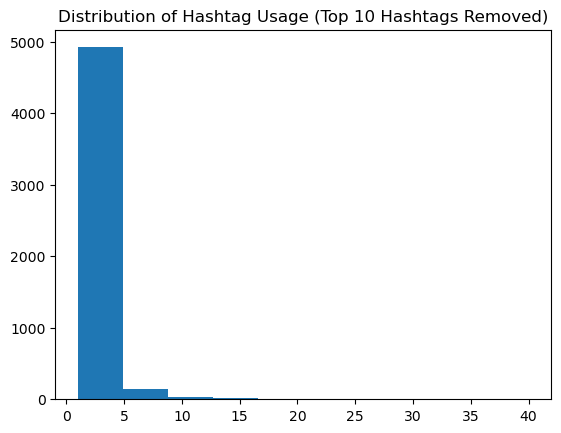

In [82]:
# print(sorted(tag_counts)[:-5])
plt.hist(sorted(tag_counts)[:-10])
plt.title('Distribution of Hashtag Usage (Top 10 Hashtags Removed)')
plt.show()

In [ ]:
test = '#test #fyp #new'
test = test.replace('#test','')
print(test.split())